# YES_MIS

Importing Libraries

In [254]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno 

Fetching Data from Excel

In [255]:
df=pd.read_excel('YES_BANK_MIS_REPORT.xlsx')

In [256]:
df.head()

,App_ID,UniqueID,CounterPartyName,Department,AcknowledgeUserRole,UserName,Type Of Application,ApplicationStatus,RegionName,DateOfInput,Approval Date,ApplicatonRM,ApplicationAnalyst,ApplicationAnalystStartDate,ApplicationEndDate,CAMFinalizationDate,Amount
0,APP-1277,CTPT-2425,Stainox Alloys Pvt Ltd,Emerging Local Corporates - MEB - BU,Relationship Manager,Geeta Naik,Renewal,WIP,WEST,2020-01-31,NaT,NaN,NaN,NaT,NaT,NaT,0.0
1,APP-1278,CTPT-2426,Xyz Ltd,Emerging Local Corporates - MEB - BU,Relationship Manager,Shashwat Krishn,Fresh,WIP,NORTH,2020-01-31,NaT,NaN,NaN,NaT,NaT,NaT,100000000.0
2,APP-1282,CTPT-2430,Sunland Recycling Industries Limited,Emerging Local Corporates - MEB - BU,Relationship Manager,Nikhil Phuria,Renewal,WIP,WEST,2020-01-31,NaT,NaN,NaN,NaT,NaT,NaT,0.0
3,APP-1283,CTPT-2422,E-con Packaging Pvt Ltd,Emerging Local Corporates - MEB - BU,Relationship Manager,priya rm2,Renewal,WIP,WEST,2020-01-31,NaT,NaN,NaN,NaT,NaT,NaT,0.0
4,APP-1284,CTPT-2419,Abhay Ispat,Emerging Local Corporates - MEB - BU,Relationship Manager,Neelesh Agarwal,Fresh,WIP,WEST,2020-01-31,NaT,NaN,NaN,NaT,NaT,NaT,510000000.0


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   App_ID                       427 non-null    object        
 1   UniqueID                     425 non-null    object        
 2   CounterPartyName             425 non-null    object        
 3   Department                   425 non-null    object        
 4   AcknowledgeUserRole          233 non-null    object        
 5   UserName                     192 non-null    object        
 6   Type Of Application          425 non-null    object        
 7   ApplicationStatus            425 non-null    object        
 8   RegionName                   425 non-null    object        
 9   DateOfInput                  425 non-null    datetime64[ns]
 10  Approval Date                95 non-null     datetime64[ns]
 11  ApplicatonRM                 412 non-null    

In [258]:
 df.columns

Index(['App_ID', 'UniqueID', 'CounterPartyName', 'Department',
       'AcknowledgeUserRole', 'UserName', 'Type Of Application',
       'ApplicationStatus', 'RegionName', 'DateOfInput', 'Approval Date',
       'ApplicatonRM', 'ApplicationAnalyst', 'ApplicationAnalystStartDate',
       'ApplicationEndDate', 'CAMFinalizationDate', 'Amount'],
      dtype='object')

In [259]:
df.describe()

,Amount
count,4.250000e+02
mean,4.379813e+11
std,6.926782e+12
min,0.000000e+00
25%,1.100000e+07
50%,4.400000e+07
75%,4.750000e+08
max,1.400000e+14


### 1. Checking for missing values


In [260]:
df.isna().sum()

App_ID                           0
UniqueID                         2
CounterPartyName                 2
Department                       2
AcknowledgeUserRole            194
UserName                       235
Type Of Application              2
ApplicationStatus                2
RegionName                       2
DateOfInput                      2
Approval Date                  332
ApplicatonRM                    15
ApplicationAnalyst             228
ApplicationAnalystStartDate    228
ApplicationEndDate             235
CAMFinalizationDate            233
Amount                           2
dtype: int64

# Data Cleaning

### Dropping Features which having 80% Null values

In [261]:
null_morethan_20= df.isna().sum()/len(df)*100 > 20

In [262]:
dropping_features=null_morethan_20[null_morethan_20==1].index

In [263]:
dropping_features

Index(['AcknowledgeUserRole', 'UserName', 'Approval Date',
       'ApplicationAnalyst', 'ApplicationAnalystStartDate',
       'ApplicationEndDate', 'CAMFinalizationDate'],
      dtype='object')

In [264]:
df=df.drop(dropping_features,axis=1)

In [265]:
df.head()

,App_ID,UniqueID,CounterPartyName,Department,Type Of Application,ApplicationStatus,RegionName,DateOfInput,ApplicatonRM,Amount
0,APP-1277,CTPT-2425,Stainox Alloys Pvt Ltd,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,2020-01-31,NaN,0.0
1,APP-1278,CTPT-2426,Xyz Ltd,Emerging Local Corporates - MEB - BU,Fresh,WIP,NORTH,2020-01-31,NaN,100000000.0
2,APP-1282,CTPT-2430,Sunland Recycling Industries Limited,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,2020-01-31,NaN,0.0
3,APP-1283,CTPT-2422,E-con Packaging Pvt Ltd,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,2020-01-31,NaN,0.0
4,APP-1284,CTPT-2419,Abhay Ispat,Emerging Local Corporates - MEB - BU,Fresh,WIP,WEST,2020-01-31,NaN,510000000.0


In [266]:
df.columns

Index(['App_ID', 'UniqueID', 'CounterPartyName', 'Department',
       'Type Of Application', 'ApplicationStatus', 'RegionName', 'DateOfInput',
       'ApplicatonRM', 'Amount'],
      dtype='object')

### Dropping some Unwanted Columns

In [267]:
unw_cols=['App_ID', 'UniqueID','DateOfInput']

In [268]:
df=df.drop(unw_cols,axis=1)

In [269]:
df.head()

,CounterPartyName,Department,Type Of Application,ApplicationStatus,RegionName,ApplicatonRM,Amount
0,Stainox Alloys Pvt Ltd,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,NaN,0.0
1,Xyz Ltd,Emerging Local Corporates - MEB - BU,Fresh,WIP,NORTH,NaN,100000000.0
2,Sunland Recycling Industries Limited,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,NaN,0.0
3,E-con Packaging Pvt Ltd,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,NaN,0.0
4,Abhay Ispat,Emerging Local Corporates - MEB - BU,Fresh,WIP,WEST,NaN,510000000.0


In [270]:
df.isna().sum()

CounterPartyName        2
Department              2
Type Of Application     2
ApplicationStatus       2
RegionName              2
ApplicatonRM           15
Amount                  2
dtype: int64

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CounterPartyName     425 non-null    object 
 1   Department           425 non-null    object 
 2   Type Of Application  425 non-null    object 
 3   ApplicationStatus    425 non-null    object 
 4   RegionName           425 non-null    object 
 5   ApplicatonRM         412 non-null    object 
 6   Amount               425 non-null    float64
dtypes: float64(1), object(6)
memory usage: 23.5+ KB


In [272]:
df[df['Amount'].isnull()]

,CounterPartyName,Department,Type Of Application,ApplicationStatus,RegionName,ApplicatonRM,Amount
425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
df.head()

,CounterPartyName,Department,Type Of Application,ApplicationStatus,RegionName,ApplicatonRM,Amount
0,Stainox Alloys Pvt Ltd,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,NaN,0.0
1,Xyz Ltd,Emerging Local Corporates - MEB - BU,Fresh,WIP,NORTH,NaN,100000000.0
2,Sunland Recycling Industries Limited,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,NaN,0.0
3,E-con Packaging Pvt Ltd,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,NaN,0.0
4,Abhay Ispat,Emerging Local Corporates - MEB - BU,Fresh,WIP,WEST,NaN,510000000.0


In [274]:
df.isna().sum()

CounterPartyName        2
Department              2
Type Of Application     2
ApplicationStatus       2
RegionName              2
ApplicatonRM           15
Amount                  2
dtype: int64

In [275]:
df=df[~(df['Amount'].isna())]

In [276]:
df.isna().sum()

CounterPartyName        0
Department              0
Type Of Application     0
ApplicationStatus       0
RegionName              0
ApplicatonRM           13
Amount                  0
dtype: int64

In [277]:
df['ApplicatonRM'].unique()

array([nan, 'Anish Lakhotiya', 'Gaurav Kumar', 'yblmeb -rm',
       'siddhish gb', 'Priya RM', 'priya rm2', 'Sheetal SG', 'Soumya RM',
       'Ahana Aadiswan', 'Mitul aadiswan', 'AS Admin', 'Suresh P',
       'AbhinayFName AbhinayLName', 'Abhishek Bafna',
       'AkashFName AkashLName', 'Anirudh Kowtha', 'Gourab Datta',
       'Harsh Jhaveri', 'Hiten Modi', 'Jyoti Mehta', 'Mohit Gaurav Sinha',
       'Nikunj Negandhi', 'Nisarg Joshi', 'Partha Paul',
       'Pratik Patankar', 'Ramesh Bhanushali', 'Raunak Rao',
       'Rohit Bharate', 'Rohit Kumar Chitambar Shastry Yelleswarapu',
       'Sajan Shah', 'Sandeep Jain', 'Sangramsingh Powar',
       'Sanjana Agrawal', 'Srishti Goyal', 'Vedvyas Nayak',
       'Arnab KR Ghosh', 'Karan Pahwa', 'Mihir Gupta', 'Nikhil Awasthi',
       'Nitin Mehta', 'Omkar Tawde', 'Parul Singh',
       'Renu Balwada Balwada', 'Vineet Arora', 'Shyam Bhagwat', 'PV user',
       'Nabeel Shaikh', 'Vivek Mishra', 'meghana reddy', 'Gopal Agrawal',
       'Meghana Reddy'

In [278]:
df=df.drop(['ApplicatonRM'],axis=1)

In [279]:
df.columns

Index(['CounterPartyName', 'Department', 'Type Of Application',
       'ApplicationStatus', 'RegionName', 'Amount'],
      dtype='object')

In [280]:
df.isna().sum()

CounterPartyName       0
Department             0
Type Of Application    0
ApplicationStatus      0
RegionName             0
Amount                 0
dtype: int64

## AMOUNT is Target Variable

In [281]:
x=df.drop('Amount',axis=1)

In [282]:
y=df.Amount

# Performing Label Encoding on Categorical Features


In [283]:
from sklearn import preprocessing


In [284]:
def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:

        le_X=preprocessing.LabelEncoder()
        dataframe[i]=le_X.fit_transform(dataframe[i])

In [285]:
x.columns

Index(['CounterPartyName', 'Department', 'Type Of Application',
       'ApplicationStatus', 'RegionName'],
      dtype='object')

In [287]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 0 to 424
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CounterPartyName     425 non-null    object
 1   Department           425 non-null    object
 2   Type Of Application  425 non-null    object
 3   ApplicationStatus    425 non-null    object
 4   RegionName           425 non-null    object
dtypes: object(5)
memory usage: 19.9+ KB


In [288]:
 le_X=preprocessing.LabelEncoder()

In [289]:
x['RegionName']=le_X.fit_transform(x['RegionName'])

In [290]:
x['Department']=le_X.fit_transform(x['Department'])

In [291]:
x['Type Of Application']=le_X.fit_transform(x['Type Of Application'])

In [292]:
x['ApplicationStatus']=le_X.fit_transform(x['ApplicationStatus'])

In [298]:
x['CounterPartyName ']=le_X.fit_transform(x['CounterPartyName'])

In [294]:
x['CounterPartyName'].unique()

array(['Stainox Alloys Pvt Ltd', 'Xyz Ltd',
       'Sunland Recycling Industries Limited', 'E-con Packaging Pvt Ltd',
       'Abhay Ispat', 'ABC P L', 'Amarjit parihar',
       'Onward Technologies Limited', 'PQR Limited',
       'Hamilton Housewares Pvt. Ltd.', 'OPOS', 'Test 2 March 2020',
       'TEST 3 MARCH', 'Test validation', 'Test val 2', 'Loki', 'Vintage',
       'Gaurav_Test01', 'IOM_test1', 'Testlc', 'Town', 'Prime',
       datetime.datetime(2008, 10, 1, 0, 0), 'Puma Fashion',
       'Mahashila Jewellery', 'Test 21 Nov 2019', 'GB_BU_test1',
       'Nexus_test_Abee', 'Ajio', 'Reebok International Limited',
       'Mahindra Finance', 'HSBC', 'Seven eleven', 'Apple INC.',
       'RAROC_Lokesh_Test', 'Cisco Inc.', 'Suvidha Pvt Ltd',
       'Radius Systems Limited', 'Cipla Limited', 'Titan Comapny Ltd',
       'Tem Plates', 'Test_Ajith', 'Test_02_Ajit', 'Delaware Inc',
       'RAROC Limited', 'Intellect Software solutions Pvt Ltd',
       'Abee_Intellect Software soltn', 'Addwf_te

In [297]:
x['CounterPartyName']=x['CounterPartyName'].astype(str)


In [299]:
x.head()

,CounterPartyName,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName
0,Stainox Alloys Pvt Ltd,2,7,5,2,167
1,Xyz Ltd,2,1,5,0,230
2,Sunland Recycling Industries Limited,2,7,5,2,171
3,E-con Packaging Pvt Ltd,2,7,5,2,59
4,Abhay Ispat,2,1,5,2,9


In [300]:
x_bkp=x

In [301]:
x=x.drop('CounterPartyName',axis=1)

In [302]:
x.head()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName
0,2,7,5,2,167
1,2,1,5,0,230
2,2,7,5,2,171
3,2,7,5,2,59
4,2,1,5,2,9


### Splitting Dataset into Train & Test Datasets 

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((297, 5), (128, 5), (297,), (128,))

### Performing Linear Regression Model 

In [304]:
from sklearn import  linear_model, metrics


In [305]:
reg = linear_model.LinearRegression()


In [306]:
reg.fit(X_train, y_train)


LinearRegression()

In [307]:
y_pred=reg.predict(X_test)


In [308]:
y_pred

array([-1.90399261e+11,  5.98738361e+11, -9.39975028e+10,  6.24518281e+11,
       -1.40134963e+11,  6.06104052e+11, -7.74246972e+10,  6.17152589e+11,
        5.67434173e+11, -1.23961917e+11,  8.28916216e+11, -9.95217713e+10,
        9.80231073e+10,  6.26359704e+11,  8.29240102e+11,  4.91935836e+11,
        7.81245886e+10,  2.23099796e+11, -2.03405891e+10,  4.27486037e+11,
       -5.26164332e+10, -1.93758222e+11, -2.15757927e+11,  7.28318989e+11,
        1.28050221e+10,  4.48304193e+11, -1.29748977e+10,  9.93518957e+10,
       -5.75948200e+10,  6.34406424e+11,  9.71865876e+10,  1.62705412e+11,
       -4.61205089e+10,  2.16106674e+11, -5.16447774e+10,  5.95055515e+11,
        7.62624994e+11,  1.12241856e+11,  2.62625206e+09,  2.23099796e+11,
       -9.87766320e+10, -5.72771876e+09, -2.68062906e+11,  7.93929182e+11,
        7.28075355e+09,  1.35287359e+10,  1.14083278e+11, -2.64380060e+11,
       -7.92661201e+10, -4.64443942e+10, -6.91892388e+10,  3.11978250e+10,
       -3.31642938e+11,  

In [309]:
y

0      0.000000e+00
1      1.000000e+08
2      0.000000e+00
3      0.000000e+00
4      5.100000e+08
           ...     
420    2.000000e+09
421    2.400000e+07
422    1.400000e+07
423    1.100000e+07
424    1.100000e+07
Name: Amount, Length: 425, dtype: float64

In [310]:
y_df=pd.DataFrame(y)

In [311]:
y.unique()

array([0.0000000e+00, 1.0000000e+08, 5.1000000e+08, 2.0000000e+08,
       1.3500000e+08, 4.4000000e+07, 4.0000000e+07, 1.6000000e+08,
       1.2000000e+06, 1.0000000e+06, 1.1000000e+07, 8.8000000e+07,
       1.2000000e+07, 2.3000000e+07, 5.7450000e+08, 3.8500000e+08,
       3.4000000e+07, 1.3000000e+07, 2.5000000e+09, 5.0076700e+09,
       5.0000000e+12, 3.1000000e+08, 5.0000000e+08, 5.4628000e+08,
       6.8000000e+08, 7.0000000e+08, 2.5076700e+09, 2.0000000e+09,
       1.9000000e+11, 1.5000000e+08, 4.5000000e+07, 3.7320000e+09,
       1.2340000e+09, 2.0000000e+06, 8.0000000e+06, 8.5250000e+09,
       2.0000000e+07, 6.4550000e+09, 8.5750000e+09, 2.2000000e+07,
       1.9100000e+08, 1.2000000e+08, 3.5400000e+08, 7.5000000e+07,
       3.9000000e+07, 1.3000000e+08, 1.2400000e+08, 3.2400000e+08,
       6.5800000e+08, 1.3800000e+09, 1.5700000e+08, 4.7500000e+08,
       6.7500000e+08, 1.2000000e+09, 4.5270000e+09, 1.3860000e+09,
       1.5000000e+07, 3.1050000e+08, 8.0400000e+08, 3.0550000e

In [312]:
y_df

,Amount
0,0.000000e+00
1,1.000000e+08
2,0.000000e+00
3,0.000000e+00
4,5.100000e+08
...,...
420,2.000000e+09
421,2.400000e+07
422,1.400000e+07
423,1.100000e+07


### Performing MinMax Scaling on Target Variable


In [313]:
from sklearn.preprocessing import MinMaxScaler
scaler_norm = MinMaxScaler()


In [314]:
 scaler_norm.fit(y_df)
y_df_norm = scaler_norm.transform(y_df) 


In [315]:
from sklearn.model_selection import train_test_split
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    x,
    y_df_norm,
    test_size=0.3,
    random_state=0)

X_train_norm.shape, X_test_norm.shape, y_train_norm.shape, y_test_norm.shape

((297, 5), (128, 5), (297, 1), (128, 1))

In [316]:
reg.fit(X_train_norm, y_train_norm)


LinearRegression()

In [317]:
y_pred_norm=reg.predict(X_test_norm)


In [318]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [319]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1344849054835.724


In [320]:
print("NORM_MAE",mean_absolute_error(y_test_norm,y_pred_norm))

NORM_MAE 0.00960606467739802


In [321]:
y_pred_norm

array([[-1.35999472e-03],
       [ 4.27670258e-03],
       [-6.71410734e-04],
       [ 4.46084486e-03],
       [-1.00096402e-03],
       [ 4.32931466e-03],
       [-5.53033552e-04],
       [ 4.40823278e-03],
       [ 4.05310123e-03],
       [-8.85442262e-04],
       [ 5.92083012e-03],
       [-7.10869795e-04],
       [ 7.00165052e-04],
       [ 4.47399788e-03],
       [ 5.92314358e-03],
       [ 3.51382740e-03],
       [ 5.58032776e-04],
       [ 1.59356997e-03],
       [-1.45289922e-04],
       [ 3.05347169e-03],
       [-3.75831666e-04],
       [-1.38398730e-03],
       [-1.54112805e-03],
       [ 5.20227849e-03],
       [ 9.14644434e-05],
       [ 3.20217281e-03],
       [-9.26778409e-05],
       [ 7.09656398e-04],
       [-4.11391571e-04],
       [ 4.53147446e-03],
       [ 6.94189911e-04],
       [ 1.16218151e-03],
       [-3.29432206e-04],
       [ 1.54361910e-03],
       [-3.68891267e-04],
       [ 4.25039654e-03],
       [ 5.44732139e-03],
       [ 8.01727540e-04],
       [ 1.8

In [322]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [323]:
def decoding(colmns):
    c_list=list(df[colmns])
    c_value=label_encoder.fit_transform(c_list)
    c_keys=label_encoder.inverse_transform(label_encoder.fit_transform(c_list))
    mergeLists_c = dict(zip( c_value,c_keys))
    print(mergeLists_c)


In [324]:
df['CounterPartyName']=df['CounterPartyName'].astype('str')

In [325]:
df.head()

,CounterPartyName,Department,Type Of Application,ApplicationStatus,RegionName,Amount
0,Stainox Alloys Pvt Ltd,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,0.0
1,Xyz Ltd,Emerging Local Corporates - MEB - BU,Fresh,WIP,NORTH,100000000.0
2,Sunland Recycling Industries Limited,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,0.0
3,E-con Packaging Pvt Ltd,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,0.0
4,Abhay Ispat,Emerging Local Corporates - MEB - BU,Fresh,WIP,WEST,510000000.0


In [326]:
df.columns

Index(['CounterPartyName', 'Department', 'Type Of Application',
       'ApplicationStatus', 'RegionName', 'Amount'],
      dtype='object')

In [327]:
decoding('Department')

{2: 'Emerging Local Corporates - MEB - BU', 5: 'LC/Large Corporate - LC - BU', 0: 'CB/Corporate Banking - CB - BU', 3: 'GB/Government Banking - GB - BU', 6: 'MCB/Multi National Corporate Banking - MCB - BU', 1: 'ECB/Emerging Corporates Banking - ECB - BU', 7: 'Strategic Client Group I - SCGI - BU', 4: 'Institutional and International Banking - IIB - BU'}


In [328]:
decoding('Type Of Application')

{7: 'Renewal', 1: 'Fresh', 4: 'In Process', 0: 'Enhancement', 6: 'Modification in Facilities', 3: 'IOM Limit Extension', 8: 'Term Loan-Review', 2: 'IOM', 5: 'Inter Office Memorandum'}


In [329]:
decoding('ApplicationStatus')

{5: 'WIP', 2: 'DECLINE', 0: 'APPROVE', 1: 'APPROVE WITH CONDITION', 4: 'RECOMMENDED', 3: 'PENDING'}


In [330]:
decoding('RegionName')

{2: 'WEST', 0: 'NORTH', 1: 'SOUTH'}


In [334]:
decoding('CounterPartyName')

{167: 'Stainox Alloys Pvt Ltd', 230: 'Xyz Ltd', 171: 'Sunland Recycling Industries Limited', 59: 'E-con Packaging Pvt Ltd', 9: 'Abhay Ispat', 3: 'ABC P L', 19: 'Amarjit parihar', 125: 'Onward Technologies Limited', 128: 'PQR Limited', 78: 'Hamilton Housewares Pvt. Ltd.', 123: 'OPOS', 188: 'Test 2 March 2020', 179: 'TEST 3 MARCH', 195: 'Test validation', 194: 'Test val 2', 100: 'Loki', 223: 'Vintage', 74: 'Gaurav_Test01', 83: 'IOM_test1', 210: 'Testlc', 216: 'Town', 132: 'Prime', 0: '2008-10-01 00:00:00', 136: 'Puma Fashion', 103: 'Mahashila Jewellery', 189: 'Test 21 Nov 2019', 72: 'GB_BU_test1', 120: 'Nexus_test_Abee', 18: 'Ajio', 146: 'Reebok International Limited', 104: 'Mahindra Finance', 77: 'HSBC', 158: 'Seven eleven', 21: 'Apple INC.', 141: 'RAROC_Lokesh_Test', 46: 'Cisco Inc.', 174: 'Suvidha Pvt Ltd', 143: 'Radius Systems Limited', 45: 'Cipla Limited', 212: 'Titan Comapny Ltd', 186: 'Tem Plates', 208: 'Test_Ajith', 202: 'Test_02_Ajit', 55: 'Delaware Inc', 139: 'RAROC Limited', 8

In [335]:
reg.predict([[4,2,0,4,101]])


array([[0.00053932]])

In [336]:
scaler_norm.inverse_transform(y_df_norm)


array([[0.0000000e+00],
       [1.0000000e+08],
       [0.0000000e+00],
       [0.0000000e+00],
       [5.1000000e+08],
       [2.0000000e+08],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.0000000e+08],
       [0.0000000e+00],
       [1.0000000e+08],
       [1.0000000e+08],
       [1.3500000e+08],
       [4.4000000e+07],
       [0.0000000e+00],
       [4.0000000e+07],
       [1.6000000e+08],
       [4.4000000e+07],
       [4.4000000e+07],
       [4.0000000e+07],
       [1.6000000e+08],
       [1.6000000e+08],
       [4.4000000e+07],
       [4.4000000e+07],
       [4.0000000e+07],
       [4.0000000e+07],
       [1.2000000e+06],
       [1.0000000e+06],
       [1.1000000e+07],
       [1.0000000e+06],
       [0.0000000e+00],
       [8.8000000e+07],
       [8.8000000e+07],
       [8.8000000e+07],
       [1.2000000e+07],
       [2.3000000e+07],
       [5.7450000e+08],
       [5.7450000e+08],
       [3.8500000e+08],
       [1.0000000e+06],
       [1.0000000e+06],
       [1.200000

In [339]:
scaler_norm.inverse_transform([[0.00053932]])


array([[7.55048e+10]])

In [337]:
df.head()

,CounterPartyName,Department,Type Of Application,ApplicationStatus,RegionName,Amount
0,Stainox Alloys Pvt Ltd,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,0.0
1,Xyz Ltd,Emerging Local Corporates - MEB - BU,Fresh,WIP,NORTH,100000000.0
2,Sunland Recycling Industries Limited,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,0.0
3,E-con Packaging Pvt Ltd,Emerging Local Corporates - MEB - BU,Renewal,WIP,WEST,0.0
4,Abhay Ispat,Emerging Local Corporates - MEB - BU,Fresh,WIP,WEST,510000000.0


In [340]:
x.head()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName
0,2,7,5,2,167
1,2,1,5,0,230
2,2,7,5,2,171
3,2,7,5,2,59
4,2,1,5,2,9


# K_means

In [341]:
df_kmeans=x.join(y)

In [342]:
df_kmeans

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount
0,2,7,5,2,167,0.000000e+00
1,2,1,5,0,230,1.000000e+08
2,2,7,5,2,171,0.000000e+00
3,2,7,5,2,59,0.000000e+00
4,2,1,5,2,9,5.100000e+08
...,...,...,...,...,...,...
420,2,2,5,2,60,2.000000e+09
421,4,1,5,1,82,2.400000e+07
422,4,1,5,1,41,1.400000e+07
423,2,7,5,1,1,1.100000e+07


In [343]:
from sklearn.cluster import KMeans

In [344]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df_kmeans)
    wcss.append(km.inertia_)

C:\Users\chira\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [345]:
wcss

[2.034365282434996e+28,
 8.201581178001193e+26,
 2.499694162022861e+25,
 8.318330946147592e+22,
 2.4838687427621217e+22,
 6.251714306922818e+21,
 2.021376343576339e+21,
 1.3743980391215658e+21,
 7.689269699560664e+20,
 4.926630721134579e+20]

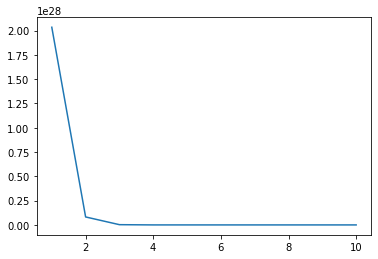

In [346]:
plt.plot(range(1,11),wcss)

In [347]:
X_means = df_kmeans.iloc[:,:].values
X_means

array([[2.00e+00, 7.00e+00, 5.00e+00, 2.00e+00, 1.67e+02, 0.00e+00],
       [2.00e+00, 1.00e+00, 5.00e+00, 0.00e+00, 2.30e+02, 1.00e+08],
       [2.00e+00, 7.00e+00, 5.00e+00, 2.00e+00, 1.71e+02, 0.00e+00],
       ...,
       [4.00e+00, 1.00e+00, 5.00e+00, 1.00e+00, 4.10e+01, 1.40e+07],
       [2.00e+00, 7.00e+00, 5.00e+00, 1.00e+00, 1.00e+00, 1.10e+07],
       [2.00e+00, 7.00e+00, 5.00e+00, 1.00e+00, 1.00e+00, 1.10e+07]])

In [348]:
km = KMeans(n_clusters=3)


In [349]:
y_means = km.fit_predict(X_means)

In [350]:
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [353]:
np.count_nonzero(y_means)

3

In [354]:
df_kmeans['cluster']=y_means


In [355]:
df_kmeans.head()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount,cluster
0,2,7,5,2,167,0.0,0
1,2,1,5,0,230,100000000.0,0
2,2,7,5,2,171,0.0,0
3,2,7,5,2,59,0.0,0
4,2,1,5,2,9,510000000.0,0


In [356]:
df_kmeans['cluster'].value_counts()

0    422
2      2
1      1
Name: cluster, dtype: int64

### Scaling the data

In [357]:
df_kmeans.head()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount,cluster
0,2,7,5,2,167,0.0,0
1,2,1,5,0,230,100000000.0,0
2,2,7,5,2,171,0.0,0
3,2,7,5,2,59,0.0,0
4,2,1,5,2,9,510000000.0,0


In [358]:
df_kmeans=df_kmeans.drop('cluster',axis=1)

In [359]:
df_kmeans.head()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount
0,2,7,5,2,167,0.0
1,2,1,5,0,230,100000000.0
2,2,7,5,2,171,0.0
3,2,7,5,2,59,0.0
4,2,1,5,2,9,510000000.0


In [360]:
 scaler_norm.fit(df_kmeans)
df_kmeans_norm = scaler_norm.transform(df_kmeans) 

In [364]:
df_kmeans_norm_df=pd.DataFrame(df_kmeans_norm,columns=df_kmeans.columns)

In [365]:
df_kmeans_norm_df.head()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount
0,0.285714,0.875,1.0,1.0,0.713675,0.000000e+00
1,0.285714,0.125,1.0,0.0,0.982906,7.142857e-07
2,0.285714,0.875,1.0,1.0,0.730769,0.000000e+00
3,0.285714,0.875,1.0,1.0,0.252137,0.000000e+00
4,0.285714,0.125,1.0,1.0,0.038462,3.642857e-06


In [366]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df_kmeans_norm_df)
    wcss.append(km.inertia_)

C:\Users\chira\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [367]:
wcss

[150.747273461625,
 80.69900907208954,
 60.647930339628125,
 48.10879274868661,
 39.49769342010434,
 34.41271026622248,
 29.35161169958489,
 24.581045503107614,
 21.65616321180246,
 20.717799426588137]

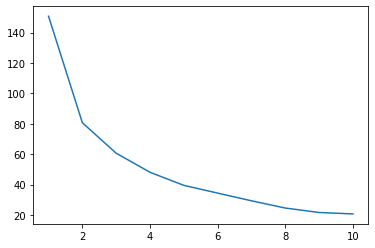

In [368]:
plt.plot(range(1,11),wcss)

In [369]:
X_means_norm = df_kmeans_norm_df.iloc[:,:].values
X_means_norm

array([[2.85714286e-01, 8.75000000e-01, 1.00000000e+00, 1.00000000e+00,
        7.13675214e-01, 0.00000000e+00],
       [2.85714286e-01, 1.25000000e-01, 1.00000000e+00, 0.00000000e+00,
        9.82905983e-01, 7.14285714e-07],
       [2.85714286e-01, 8.75000000e-01, 1.00000000e+00, 1.00000000e+00,
        7.30769231e-01, 0.00000000e+00],
       ...,
       [5.71428571e-01, 1.25000000e-01, 1.00000000e+00, 5.00000000e-01,
        1.75213675e-01, 1.00000000e-07],
       [2.85714286e-01, 8.75000000e-01, 1.00000000e+00, 5.00000000e-01,
        4.27350427e-03, 7.85714286e-08],
       [2.85714286e-01, 8.75000000e-01, 1.00000000e+00, 5.00000000e-01,
        4.27350427e-03, 7.85714286e-08]])

In [370]:
km = KMeans(n_clusters=3)


In [371]:
y_means_norm = km.fit_predict(X_means_norm)

In [372]:
y_means_norm

array([2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1,
       2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 0, 1, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1,

In [373]:
df_kmeans_norm_df['scalin_cluster']=y_means_norm


In [374]:
df_kmeans_norm_df

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount,scalin_cluster
0,0.285714,0.875,1.0,1.0,0.713675,0.000000e+00,2
1,0.285714,0.125,1.0,0.0,0.982906,7.142857e-07,2
2,0.285714,0.875,1.0,1.0,0.730769,0.000000e+00,2
3,0.285714,0.875,1.0,1.0,0.252137,0.000000e+00,0
4,0.285714,0.125,1.0,1.0,0.038462,3.642857e-06,0
...,...,...,...,...,...,...,...
420,0.285714,0.250,1.0,1.0,0.256410,1.428571e-05,0
421,0.571429,0.125,1.0,0.5,0.350427,1.714286e-07,0
422,0.571429,0.125,1.0,0.5,0.175214,1.000000e-07,0
423,0.285714,0.875,1.0,0.5,0.004274,7.857143e-08,0


In [377]:
df_kmeans_norm_df['scalin_cluster'].value_counts()

0    175
2    136
1    114
Name: scalin_cluster, dtype: int64

In [380]:
df_kmeans_norm_df.columns

Index(['Department', 'Type Of Application', 'ApplicationStatus', 'RegionName',
       'CounterPartyName ', 'Amount', 'scalin_cluster'],
      dtype='object')

In [379]:
df_kmeans_norm_df1 = df_kmeans_norm_df[df_kmeans_norm_df.scalin_cluster==0]
df_kmeans_norm_df2 = df_kmeans_norm_df[df_kmeans_norm_df.scalin_cluster==1]
df_kmeans_norm_df3 = df_kmeans_norm_df[df_kmeans_norm_df.scalin_cluster==2]

No handles with labels found to put in legend.


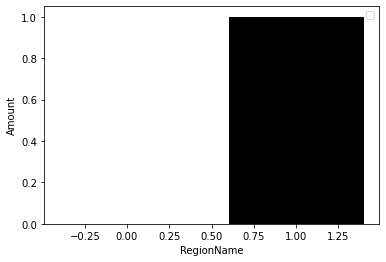

In [381]:
plt.bar(df_kmeans_norm_df1['RegionName'],df_kmeans_norm_df1['Amount'],color='green')
plt.bar(df_kmeans_norm_df2['RegionName'],df_kmeans_norm_df2['Amount'],color='red')
plt.bar(df_kmeans_norm_df3['RegionName'],df_kmeans_norm_df3['Amount'],color='black')

plt.xlabel('RegionName')
plt.ylabel('Amount')
plt.legend()

<BarContainer object of 114 artists>

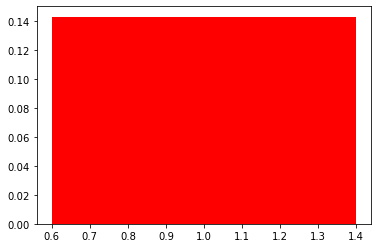

In [382]:
plt.bar(df_kmeans_norm_df2['RegionName'],df_kmeans_norm_df2['Amount'],color='red')


In [384]:
clust_mean=df_kmeans_norm_df.groupby('scalin_cluster').mean().reset_index()
clust_mean

,scalin_cluster,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount
0,0,0.293061,0.260000,0.987429,0.982857,0.239341,0.000018
1,1,0.285714,0.199561,0.080702,1.000000,0.537412,0.002829
2,2,0.327731,0.294118,0.994118,0.977941,0.748775,0.007382


In [387]:
clust_mean['freq']=df_kmeans_norm_df['scalin_cluster'].value_counts().sort_index()
clust_mean

,scalin_cluster,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount,freq
0,0,0.293061,0.260000,0.987429,0.982857,0.239341,0.000018,175
1,1,0.285714,0.199561,0.080702,1.000000,0.537412,0.002829,114
2,2,0.327731,0.294118,0.994118,0.977941,0.748775,0.007382,136


<BarContainer object of 3 artists>

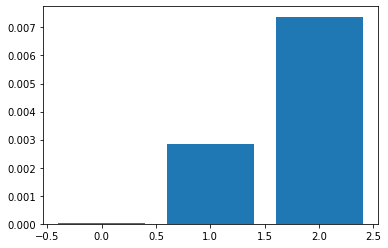

In [389]:
plt.bar(clust_mean.scalin_cluster,clust_mean['Amount'])


<BarContainer object of 3 artists>

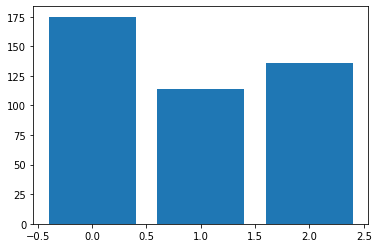

In [390]:
plt.bar(clust_mean.scalin_cluster,clust_mean['freq'])


In [394]:
df_kmeans_norm_df.groupby('scalin_cluster').max()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount
scalin_cluster,,,,,,
0,0.857143,1.000,1.0,1.0,0.504274,0.000470
1,0.714286,0.875,0.4,1.0,0.995726,0.142874
2,1.000000,1.000,1.0,1.0,1.000000,1.000000


In [395]:
df_kmeans_norm_df.groupby('scalin_cluster').mean()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount
scalin_cluster,,,,,,
0,0.293061,0.260000,0.987429,0.982857,0.239341,0.000018
1,0.285714,0.199561,0.080702,1.000000,0.537412,0.002829
2,0.327731,0.294118,0.994118,0.977941,0.748775,0.007382


In [396]:
df_kmeans_norm_df.groupby('scalin_cluster').min()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount
scalin_cluster,,,,,,
0,0.0,0.0,0.6,0.0,0.000000,0.0
1,0.0,0.0,0.0,1.0,0.021368,0.0
2,0.0,0.0,0.6,0.0,0.495726,0.0


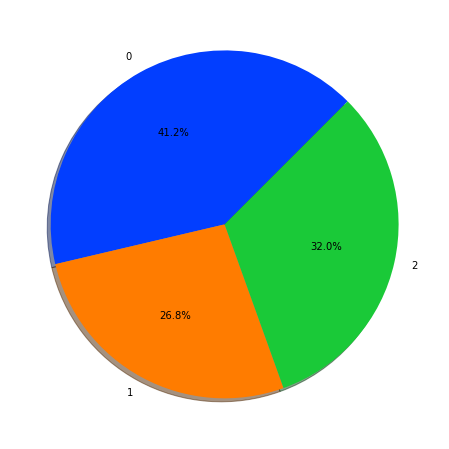

In [397]:
colors = sns.color_palette('bright')
plt.figure(figsize=(8,8))

plt.pie(clust_mean['freq'], labels=clust_mean['scalin_cluster'],autopct='%1.1f%%',shadow=True, startangle=45, colors=colors)
plt.show()

In [399]:
df_kmeans['scalin_cluster']=y_means_norm

In [400]:
df_kmeans

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount,scalin_cluster
0,2,7,5,2,167,0.000000e+00,2
1,2,1,5,0,230,1.000000e+08,2
2,2,7,5,2,171,0.000000e+00,2
3,2,7,5,2,59,0.000000e+00,0
4,2,1,5,2,9,5.100000e+08,0
...,...,...,...,...,...,...,...
420,2,2,5,2,60,2.000000e+09,0
421,4,1,5,1,82,2.400000e+07,0
422,4,1,5,1,41,1.400000e+07,0
423,2,7,5,1,1,1.100000e+07,0


In [401]:
df_kmeans.groupby('scalin_cluster').max()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount
scalin_cluster,,,,,,
0,6,8,5,2,118,6.585600e+10
1,5,7,2,2,233,2.000233e+13
2,7,8,5,2,234,1.400000e+14


In [402]:
df_kmeans.groupby('scalin_cluster').mean()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount
scalin_cluster,,,,,,
0,2.051429,2.080000,4.937143,1.965714,56.005714,2.509136e+09
1,2.000000,1.596491,0.403509,2.000000,125.754386,3.961231e+11
2,2.294118,2.352941,4.970588,1.955882,175.213235,1.033418e+12


In [403]:
df_kmeans.groupby('scalin_cluster').min()

,Department,Type Of Application,ApplicationStatus,RegionName,CounterPartyName,Amount
scalin_cluster,,,,,,
0,0,0,3,0,0,0.0
1,0,0,0,2,5,0.0
2,0,0,3,0,116,0.0


##  The insights from the project work are written to give a personal view about the work we did.

1.The Counterparty Newton from Department MCB/Multi National Corporate Banking - MCB - BU in WEST Region belongs to Term Loan-Review Application having maximum Sanctioned Amount

2.The Swarnsarita Gems Ltd from Emerging Local Corporates - MEB - BU in WEST Region belongs to IOM Application having Average Sanctioned Amount